In [1]:
from Data_Handler.preprocessing import DataHandler
from Model.ModelBuilder import ModelBuilder
from Model.Trainer import Trainer
from Test.Tester import Tester
from Test.new_data import FacePredictor  # Assuming this is your prediction class
import matplotlib.pyplot as plt
import os
import shutil


2025-05-11 02:55:22.803514: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-11 02:55:22.831225: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746921322.849772    6781 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746921322.855121    6781 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746921322.874308    6781 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

## 🚀 Dataset Preparation and Model Initialization

This section sets up the dataset pipeline and initializes the model for training.

---

### 📂 `DataHandler.create_datasets(image_dir, batch_size=32, augment_train=False)`

```python

In [2]:
data_handler = DataHandler()
model = ModelBuilder.build_model()
model = ModelBuilder.compile_model(model)
trainer = Trainer(model)

I0000 00:00:1746921326.594020    6781 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1767 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [3]:
print(model.metrics_names)

['loss', 'compile_metrics']


In [4]:

src_dir = "Data/UTKFace"
dst_dir = "Data/Processed"

if not os.path.exists(dst_dir):
    os.makedirs(dst_dir)

    total_images = 0
    filtered_images = 0

    for filename in os.listdir(src_dir):
        if not filename.lower().endswith((".jpg", ".jpeg", ".png")):
            continue

        total_images += 1

        try:
            age = int(filename.split("_")[0])
        except (IndexError, ValueError):
            continue  # Skip files with bad format

        if 5 <= age <= 80:
            src_path = os.path.join(src_dir, filename)
            dst_path = os.path.join(dst_dir, filename)
            shutil.copy2(src_path, dst_path)
            filtered_images += 1

    print(f"Total images found: {total_images}")
    print(f"Images after filtering (age 5–80): {filtered_images}")
else:
    print(f"'{dst_dir}' already exists. Skipping processing.")


'Data/Processed' already exists. Skipping processing.


In [5]:
train_data, val_data, test_data = data_handler.create_datasets(
    dst_dir,
    batch_size=28,
    augment_train=False
)

In [6]:
len(train_data)

525

In [7]:
# Train the model
trainer = Trainer(model)
print("model",model.metrics_names)
history = trainer.train(train_data, val_data=val_data, epochs=40)
print("model", model.metrics_names)
# Plot training history (optional)


model ['loss', 'compile_metrics']
Epoch 1/40


I0000 00:00:1746921348.832983    6885 service.cc:152] XLA service 0x7f2294017e20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746921348.833032    6885 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-05-11 02:55:49.522320: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746921353.129492    6885 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-05-11 02:55:56.563180: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6', 332 bytes spill stores, 332 bytes spill loads

2025-05-11 02:55:56.635496: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion

524/525 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - age_age_mae: 32.6936 - age_loss: 1321.2998 - gender_gender_accuracy: 0.5368 - gender_loss: 0.6945 - loss: 1321.9941

2025-05-11 02:57:34.192645: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6', 488 bytes spill stores, 488 bytes spill loads

2025-05-11 02:57:34.263588: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6', 332 bytes spill stores, 332 bytes spill loads

2025-05-11 02:57:34.424620: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6', 12 bytes spill stores, 12 bytes spill loads

2025-05-11 02:57:34.457393: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6', 660 bytes spill stores, 660 bytes spill loads



525/525 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - age_age_mae: 32.6867 - age_loss: 1320.8488 - gender_gender_accuracy: 0.5368 - gender_loss: 0.6944 - loss: 1321.5432

2025-05-11 02:58:15.087645: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2', 12 bytes spill stores, 12 bytes spill loads

2025-05-11 02:58:15.231374: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2', 456 bytes spill stores, 456 bytes spill loads



525/525 ━━━━━━━━━━━━━━━━━━━━ 174s 213ms/step - age_age_mae: 32.6799 - age_loss: 1320.3994 - gender_gender_accuracy: 0.5369 - gender_loss: 0.6944 - loss: 1321.0941 - val_age_age_mae: 27.4227 - val_age_loss: 970.8441 - val_gender_gender_accuracy: 0.5429 - val_gender_loss: 0.6751 - val_loss: 970.4804 - learning_rate: 1.0000e-05
Epoch 2/40
525/525 ━━━━━━━━━━━━━━━━━━━━ 63s 119ms/step - age_age_mae: 15.7845 - age_loss: 378.0241 - gender_gender_accuracy: 0.6298 - gender_loss: 0.6413 - loss: 378.6655 - val_age_age_mae: 19.6732 - val_age_loss: 607.6356 - val_gender_gender_accuracy: 0.5625 - val_gender_loss: 0.6841 - val_loss: 608.0596 - learning_rate: 1.0000e-05
Epoch 3/40
525/525 ━━━━━━━━━━━━━━━━━━━━ 63s 120ms/step - age_age_mae: 8.5942 - age_loss: 127.5909 - gender_gender_accuracy: 0.6721 - gender_loss: 0.6264 - loss: 128.2174 - val_age_age_mae: 13.3457 - val_age_loss: 315.5797 - val_gender_gender_accuracy: 0.5505 - val_gender_loss: 0.6760 - val_loss: 315.7744 - learning_rate: 1.0000e-05
Epoc

In [8]:
print("History keys:", history.history.keys())
print("Sample loss values:", history.history.get('loss', []))
print("Sample val_loss values:", history.history.get('val_loss', []))

History keys: dict_keys(['age_age_mae', 'age_loss', 'gender_gender_accuracy', 'gender_loss', 'loss', 'val_age_age_mae', 'val_age_loss', 'val_gender_gender_accuracy', 'val_gender_loss', 'val_loss', 'learning_rate'])
Sample loss values: [1085.26611328125, 275.75604248046875, 119.34162139892578, 102.30299377441406, 93.63531494140625, 86.32227325439453, 84.05950164794922, 82.16999053955078, 78.18791198730469, 74.379150390625, 75.2562255859375, 72.61141967773438, 71.1344223022461, 69.96100616455078, 69.06736755371094, 68.32256317138672, 68.74144744873047, 68.1157455444336, 67.27641296386719, 65.96078491210938, 65.48698425292969, 64.69387817382812, 64.17750549316406, 65.0893325805664, 63.671573638916016, 61.23790740966797, 62.52599334716797, 63.089900970458984, 62.26427459716797, 61.67136764526367, 61.20427703857422, 61.66362380981445, 61.68745040893555, 62.321170806884766, 60.48979187011719, 61.27846145629883]
Sample val_loss values: [970.4804077148438, 608.0595703125, 315.7744445800781, 58

Available metrics: dict_keys(['age_age_mae', 'age_loss', 'gender_gender_accuracy', 'gender_loss', 'loss', 'val_age_age_mae', 'val_age_loss', 'val_gender_gender_accuracy', 'val_gender_loss', 'val_loss', 'learning_rate'])


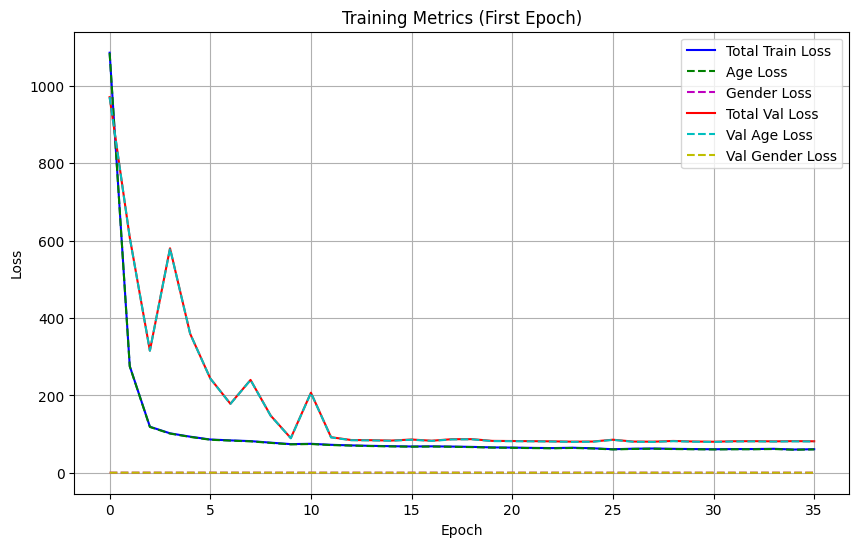

In [9]:
# First verify we have plottable data
print("Available metrics:", history.history.keys())

plt.figure(figsize=(10, 6))

# Plot training metrics
plt.plot(history.history['loss'], 'b-', label='Total Train Loss')
plt.plot(history.history['age_loss'], 'g--', label='Age Loss')
plt.plot(history.history['gender_loss'], 'm--', label='Gender Loss')

# Plot validation metrics if available
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], 'r-', label='Total Val Loss')
    plt.plot(history.history['val_age_loss'], 'c--', label='Val Age Loss')
    plt.plot(history.history['val_gender_loss'], 'y--', label='Val Gender Loss')

plt.title('Training Metrics (First Epoch)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

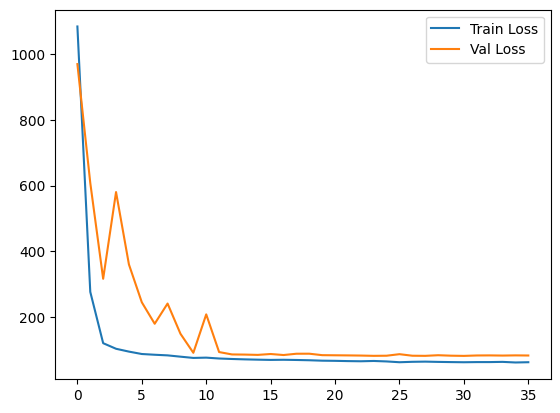

In [10]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.show()

In [11]:
trainer.save_model("new_model.keras")


In [12]:
 # Evaluate model performance
tester = Tester(model, data_handler)
metrics = tester.evaluate(test_data)
# s)  # Print accuracy/loss metrics

In [13]:
metrics

{'age_mae': 6.760019302368164, 'gender_accuracy': 0.7447618842124939}